In [20]:
#@title Keras Script for Dogs Vs cats classifier
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

classifier.fit_generator(training_set,
                         steps_per_epoch = 8000,
                         epochs = 4,
                         validation_data = test_set,
                         validation_steps = 2000)



Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/4
8000/8000 [==============================] - 1275s 159ms/step - loss: 0.3939 - acc: 0.8135 - val_loss: 0.4652 - val_acc: 0.8061
Epoch 2/4
8000/8000 [==============================] - 1290s 161ms/step - loss: 0.1771 - acc: 0.9283 - val_loss: 0.7003 - val_acc: 0.8120
Epoch 3/4
8000/8000 [==============================] - 1291s 161ms/step - loss: 0.0990 - acc: 0.9623 - val_loss: 0.8465 - val_acc: 0.7969
Epoch 4/4
8000/8000 [==============================] - 1289s 161ms/step - loss: 0.0682 - acc: 0.9749 - val_loss: 1.0148 - val_acc: 0.7966


In [0]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('20311lpr.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
 

Populating the interactive namespace from numpy and matplotlib


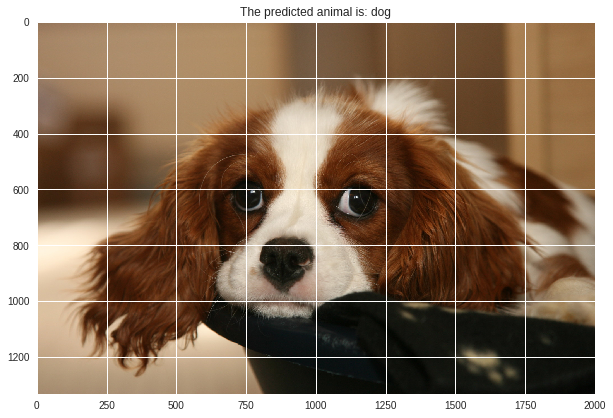

In [33]:

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('20311lpr.jpg')
plt.figure(figsize=(10,10))
imgplot = plt.imshow(img)
plt.title("The predicted animal is: {}".format(prediction))
plt.show()